In [1]:
#30/03/2022  
#================================================================
# Yolo V-3 by irfanhasib.me@gmail.com
# Inspired by -
# GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3
#================================================================
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED']=str(0)
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np
import time
import glob
import pandas as pd
from matplotlib import pyplot as plt
from multiprocessing import Process, Queue, Pipe
import time
import shutil
import json
from tqdm import tqdm,trange
import pickle
import zlib
from datetime import datetime

from yolo.model import YoloModel, calc_yolo_loss, calc_seg_loss
from yolo.decoder import YoloDecodeNetout
from yolo.dataset import Dataset
from yolo.eval import get_mAP
from yolo.utils import Utils
from yolo.seg_loader import Seg_Utils
from yolo.config import *
from yolo.tf import *
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

2022-10-12 02:17:36.313505: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-10-12 02:17:37.973526: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-12 02:17:37.981126: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-12 02:17:38.056016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 02:17:38.056671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 268.26GiB/s
2022-10-12 02:17:38.056705: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-10-12 02:17:38.088748: I tensorflow/stream_executor/platform/

In [2]:
yolo_test  = False
yolo_eval  = True
gen_preds  = False
#exp_log_path = 'logs/exp-MNET_V2_224_BASE/' # 12
exp_log_path = 'logs/exp-MNET_V2_224_MUL_SIG_5110/' #[15 , 19.1] #[
#exp_log_path = 'logs/_exp-MNET_V2_224_V32_MUL_0001_EXP_179/' # 10
#exp_log_path = 'logs/exp-MNET_V2_0.5_224_V32_IND_0001_EXP_/' # 12
BEST_EPOCH   = 10
#exp_log_path = 'logs/yolo_tiny/'
input_size = 320

In [3]:
if yolo_test == True:
    if not os.path.exists(TRAIN_CHECKPOINTS_FOLDER+'/pred_imgs'): os.makedirs(TRAIN_CHECKPOINTS_FOLDER+'/pred_imgs')
    img_path   = "/home/irfan/Desktop/Code/Datasets/COCO/val2017/"
    yolo = YoloModel()
    yolo_model = yolo.get_model()
    yolo_model.load_weights(glob.glob(f'{exp_log_path}/model/epoch_{BEST_EPOCH}*')[0]+'/weights')
    decoder = YoloDecodeNetout()
    for i,layer in enumerate(yolo_model.layers):
        yolo_model.get_layer(layer.name).trainable=False
    decoder.detect_images(yolo_model, img_path, output_path=TRAIN_CHECKPOINTS_FOLDER+'/pred_imgs/',input_size=256, show=True, score_threshold=0.3, iou_threshold=0.5, rectangle_colors='')


In [4]:
import os
os.system(f'cp {DATA_DIR}/COCO/annotations_trainval2017/annotations/instances_val2017.json {exp_log_path}/gt.json')
#mv f'{exp_log_path}/gt.json

0

In [5]:
yolo = YoloModel()
yolo_model = yolo.get_model()
#yolo.load_yolo_weights(yolo_model, YOLO_V3_TINY_WEIGHTS)
yolo_model.load_weights(glob.glob(f'./{exp_log_path}model/epoch_{BEST_EPOCH}*')[0]+'/weights')
#yolo_model.load_weights('logs/exp-LITE[416]-104/model/epoch_5_val_det_loss_31.2361/weights')
decoder = YoloDecodeNetout()

for i,layer in enumerate(yolo_model.layers):
    yolo_model.get_layer(layer.name).trainable=False

mobilenet


2022-10-12 02:17:47.449353: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-12 02:17:47.449490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 02:17:47.449675: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 268.26GiB/s
2022-10-12 02:17:47.449708: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-10-12 02:17:47.449725: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-10-12 02:17:47.449736: I tensorflow/stream_executor/platfo

getting wts from Conv1  === setting weights from Conv1 to block0_conv1
getting wts from bn_Conv1  === setting weights from bn_Conv1 to block0_bn_conv1
getting wts from expanded_conv_depthwise  === setting weights from expanded_conv_depthwise to block_xx_expanded_conv_depthwise
getting wts from expanded_conv_depthwise_BN  === setting weights from expanded_conv_depthwise_BN to block_xx_expanded_conv_depthwise_BN
getting wts from expanded_conv_project  === setting weights from expanded_conv_project to block_xx_expanded_conv_project
getting wts from expanded_conv_project_BN  === setting weights from expanded_conv_project_BN to block_xx_expanded_conv_project_BN
getting wts from block_1_expand  === setting weights from block_1_expand to block_1_expand
getting wts from block_1_expand_BN  === setting weights from block_1_expand_BN to block_1_expand_BN
getting wts from block_1_depthwise  === setting weights from block_1_depthwise to block_1_depthwise
getting wts from block_1_depthwise_BN  === s

In [6]:
test= False
with open(f'{exp_log_path}gt.json','r') as file:
     val_data = json.load(file)
img_root = 'COCO/val2017/'

if test == True:
    img_root = 'COCO/test2017/'
    test_annot_path = RAW_DATA_DIR + 'COCO/image_info_test2017/annotations/image_info_test-dev2017.json'
    with open(test_annot_path,'r') as file:
         val_data = json.load(file)
for i in range(10):
    ret = decoder.detect_image(yolo_model,yolo.decode_output, val_data['images'][i], root=RAW_DATA_DIR+img_root, output_path=TRAIN_CHECKPOINTS_FOLDER+'/pred_imgs/',input_size=input_size, show=True, score_threshold=0.1, iou_threshold=0.0, rectangle_colors='',draw=True)
    plt.imshow(ret[0])
    plt.show()
yolo_model.summary()

2022-10-12 02:17:54.231078: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-12 02:17:54.270686: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
2022-10-12 02:17:54.991420: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2022-10-12 02:17:58.757650: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-12 02:17:58.804631: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-10-12 02:17:59.570841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-10-12 02:17:59.571258: I tensorflow/stream

InvalidArgumentError: Input to reshape is a tensor with 102000 values, but the requested shape has 49980 [Op:Reshape]

In [ ]:
#ret = decoder.detect_image(yolo_model, val_data['images'][0], root=RAW_DATA_DIR+'COCO/val2017/', output_path=TRAIN_CHECKPOINTS_FOLDER+'/pred_imgs/',input_size=256, show=True, score_threshold=0.1, iou_threshold=0.0, rectangle_colors='',draw=False)

In [ ]:
import sys
path = './cocoapi/PythonAPI/build/lib.linux-x86_64-3.8/'
sys.path.insert(0,path)
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from yolo.config import *

gen_preds= True
rets = {}
for score_threshold,iou_threshold in zip([0.001],[0.5]):
    print(f'Calculation mAP for score_threshold : {score_threshold} ,iou_threshold : {iou_threshold}')
    
    if gen_preds :
        if not test:
            with open(f'{exp_log_path}gt.json','r') as file:
                 val_data = json.load(file)
        else:
            with open(test_annot_path,'r') as file:
                 val_data = json.load(file)

        results =[]
        for img in tqdm(val_data['images']):
            results+= decoder.detect_image(yolo_model,yolo.decode_output, img, root=RAW_DATA_DIR+img_root, output_path=TRAIN_CHECKPOINTS_FOLDER+'/pred_imgs/',input_size=input_size, show=True, score_threshold=score_threshold, iou_threshold=iou_threshold, rectangle_colors='',draw=False)

        with open(f'{exp_log_path}pred_{score_threshold}_{iou_threshold}.json','w') as file:
            json.dump(results,file)
    '''
    gt_file = exp_log_path+'gt.json'
    gt = COCO(gt_file)
    pred = gt.loadRes(exp_log_path+F'pred_{score_threshold}_{iou_threshold}.json')

    cocoEval = COCOeval(gt,pred,iouType='bbox')
    #cocoEval.params.imgIds  = [_id]
    #cocoEval.params.catIds  = [3]
    cocoEval.evaluate()
    cocoEval.accumulate()
    rets[(score_threshold,iou_threshold)] = cocoEval.summarize()
    del gt,pred, cocoEval
    '''
del yolo_model, decoder, results

In [ ]:
import sys
path = './cocoapi/PythonAPI/build/lib.linux-x86_64-3.8/'
sys.path.insert(0,path)
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from yolo.config import *
score_threshold,iou_threshold =0.01,0.5
gt_file = exp_log_path+'gt.json'
gt = COCO(gt_file)
pred = gt.loadRes(exp_log_path+F'pred_{score_threshold}_{iou_threshold}_{15}.json')

cocoEval = COCOeval(gt,pred,iouType='bbox')
#cocoEval.params.imgIds  = [_id]
#cocoEval.params.catIds  = [3]
cocoEval.evaluate()
cocoEval.accumulate()
rets[(score_threshold,iou_threshold)] = cocoEval.summarize()
del gt,pred, cocoEval

In [14]:
cocoEval.stats

array([0.09472628, 0.23065112, 0.06453424, 0.0574241 , 0.21354988,
       0.37156413, 0.11413246, 0.18000789, 0.19749372, 0.0330576 ,
       0.20199855, 0.3300639 ])

In [8]:
out

In [9]:
import pickle
import pandas as pd
with open('results/exp-MNET_V2_224_BASE_LATEST_pred_0.01_0.5.pkl','rb') as file:
    res = pickle.load(file)
df1 = pd.DataFrame(res).T
with open('results/exp-MNET_V2_224_MUL_SIG_5110_pred_0.01_0.5.pkl','rb') as file:
    res = pickle.load(file)
df2 = pd.DataFrame(res).T

In [14]:
df1.index = [int(ind) for ind in df1.index]

In [17]:
df2.index = [int(ind) for ind in df2.index]

In [18]:
df1 = df1.sort_index()
df2 = df2.sort_index()

In [21]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11
1,0.067445,0.178841,0.035018,0.032694,0.144733,0.300446,0.088559,0.136058,0.146878,0.015496,0.138609,0.251790
2,0.079332,0.193781,0.053902,0.036370,0.157424,0.336452,0.098235,0.150605,0.161330,0.017337,0.147335,0.297343
3,0.046453,0.131323,0.020615,0.028115,0.115163,0.197287,0.070364,0.109601,0.119669,0.010855,0.118736,0.190097
4,0.051236,0.146974,0.021286,0.031331,0.126661,0.227854,0.074352,0.117355,0.127162,0.012167,0.127154,0.205419
5,0.058262,0.159143,0.030639,0.030887,0.139439,0.252604,0.080800,0.127455,0.137907,0.013822,0.133756,0.229523
6,0.060638,0.164496,0.031871,0.031543,0.143131,0.266568,0.083253,0.131707,0.142006,0.014254,0.135997,0.241930
7,0.064604,0.169182,0.037082,0.032252,0.141669,0.278952,0.085843,0.133824,0.144782,0.014036,0.135656,0.248887
8,0.065993,0.169486,0.040767,0.032093,0.143797,0.280359,0.088570,0.137848,0.148606,0.013586,0.138334,0.259411
9,0.067595,0.178210,0.036935,0.033008,0.149929,0.297562,0.089535,0.137752,0.148890,0.015733,0.142433,0.255753
10,0.067445,0.178841,0.035018,0.032694,0.144733,0.300446,0.088559,0.136058,0.146878,0.015496,0.138609,0.251790


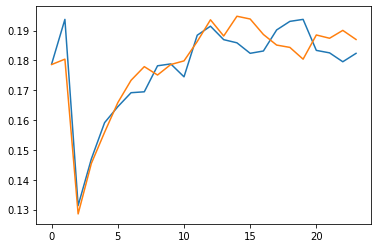

In [22]:
from matplotlib import pyplot as plt
plt.plot(df1[1].values.tolist())
plt.plot(df2[1].values.tolist())

In [23]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11
1,0.069563,0.178637,0.042416,0.029827,0.153834,0.304059,0.089736,0.140347,0.151349,0.014202,0.140742,0.266944
2,0.071880,0.180435,0.045767,0.033274,0.136395,0.312177,0.091683,0.142557,0.154548,0.016955,0.140455,0.280866
3,0.042336,0.128519,0.014789,0.025505,0.109700,0.198216,0.066496,0.104985,0.115107,0.010800,0.116465,0.183444
4,0.052179,0.145467,0.024688,0.027804,0.122957,0.232174,0.075324,0.119014,0.129218,0.012075,0.122699,0.214903
5,0.058390,0.155919,0.031771,0.030424,0.128748,0.256939,0.080785,0.125927,0.136229,0.013408,0.130366,0.226648
6,0.061415,0.165860,0.031659,0.030468,0.138762,0.272260,0.083995,0.130821,0.141751,0.014736,0.135923,0.241531
7,0.065490,0.173347,0.034080,0.031631,0.142860,0.286730,0.087190,0.135252,0.146373,0.014994,0.141208,0.245995
8,0.067891,0.177927,0.038776,0.032873,0.148249,0.295300,0.088852,0.137836,0.149123,0.016124,0.140579,0.255066
9,0.067131,0.175118,0.038652,0.030352,0.137036,0.297962,0.087020,0.133994,0.145422,0.013229,0.135364,0.250647
10,0.069563,0.178637,0.042416,0.029827,0.153834,0.304059,0.089736,0.140347,0.151349,0.014202,0.140742,0.266944


In [24]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11
1,0.067445,0.178841,0.035018,0.032694,0.144733,0.300446,0.088559,0.136058,0.146878,0.015496,0.138609,0.251790
2,0.079332,0.193781,0.053902,0.036370,0.157424,0.336452,0.098235,0.150605,0.161330,0.017337,0.147335,0.297343
3,0.046453,0.131323,0.020615,0.028115,0.115163,0.197287,0.070364,0.109601,0.119669,0.010855,0.118736,0.190097
4,0.051236,0.146974,0.021286,0.031331,0.126661,0.227854,0.074352,0.117355,0.127162,0.012167,0.127154,0.205419
5,0.058262,0.159143,0.030639,0.030887,0.139439,0.252604,0.080800,0.127455,0.137907,0.013822,0.133756,0.229523
6,0.060638,0.164496,0.031871,0.031543,0.143131,0.266568,0.083253,0.131707,0.142006,0.014254,0.135997,0.241930
7,0.064604,0.169182,0.037082,0.032252,0.141669,0.278952,0.085843,0.133824,0.144782,0.014036,0.135656,0.248887
8,0.065993,0.169486,0.040767,0.032093,0.143797,0.280359,0.088570,0.137848,0.148606,0.013586,0.138334,0.259411
9,0.067595,0.178210,0.036935,0.033008,0.149929,0.297562,0.089535,0.137752,0.148890,0.015733,0.142433,0.255753
10,0.067445,0.178841,0.035018,0.032694,0.144733,0.300446,0.088559,0.136058,0.146878,0.015496,0.138609,0.251790


In [ ]:
exp-MNET_V2_224_IND_529/ [12]
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.184
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.039

13
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.076
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.188
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048
    
14
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.075
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.189
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048

15
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.077
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.191
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049

16
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.071
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.186
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041

[17]
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.071
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.183
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.045


In [ ]:
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.103
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.244
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.071
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.067
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.233
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.386
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.121
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.189
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.041
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.217
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.342

Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.104
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.244
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.075
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.060
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.232
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.388
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.190
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.209
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.037
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.219
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.350


Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.187
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.035
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.153
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.319
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.146
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.158
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.149
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.278
    
    
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.077
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.193
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.036
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.150
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.337
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.097
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.146
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.017
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.147
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.285
    
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.075
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.188
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.046
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.036
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.157
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.321
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.096
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.146
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.158
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.279

In [ ]:
with open(f'{exp_log_path}pred_{score_threshold}_{iou_threshold}.json','w') as file:
    json.dump(results,file)

In [ ]:
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.343
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.179
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.198
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.208
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.309

Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.352
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.118
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.038
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.331

DONE (t=23.81s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.343
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.118
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.327

exp-MNET_V2_320_V32_NONE_0001_EXP_359 , epoch 19
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.104
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.245
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.074
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.064
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.236
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.384
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.122
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.191
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.039
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.218
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.354
    
exp-MNET_V2_320_V32_NONE_0001_EXP_110 , epoch 12
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.101
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.242
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.069
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.066
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.223
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.379
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.120
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.187
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.038
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.210
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.328

EPOCH 12 [ind] 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.077
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.340
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.299
    
EPOCH 11
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.192
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.341
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.151
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.301
    
EPOCH 10
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.335
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.146
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.284

EPOCH 12
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.338
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.093
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.158
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.287
    
EPOCH 11
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.036
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.271

epoch 14
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.076
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.195
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.039
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.156
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.334
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.096
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.151
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.166
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.019
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.158
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.299

ONE (t=16.28s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.156
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.340
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.019
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.305


'logs/exp-MNET_V2_224_V31_NONE_QL1_0001_EXP_103/' EPOCH 14
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.191
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.042
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.037
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.149
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.336
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.093
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.147
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.019
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.155
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.295

LITE_416_104
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.026
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.032
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.078
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.122
 
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.023
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.069
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.009
Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=100 ] = 0.012
Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=100 ] = 0.054
Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=100 ] = 0.113
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.045
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.079
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.088
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.072
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.151

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.070
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.037
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.044
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.076
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.084
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.071
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.152

In [ ]:
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.233
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.089
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.109
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.221
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.123
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.176
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.159
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.392

In [ ]:
from collections import defaultdict
with open(f'{DATA_DIR}/COCO/annotations_trainval2017/annotations/instances_val2017.json','r') as file:
    val_data = json.load(file)

class_dict = {val:key for key,val in CLASS_NAMES.items()}
id_dict = {}
for cat in val_data['categories']:
    name = cat['name']
    if name == 'motorcycle' : name = 'motorbike'
    if name == 'airplane' : name = 'aeroplane'
    if name == 'couch' : name = 'sofa'
    if name == 'tv' : name = 'tvmonitor'
    try : id_dict [cat['id']] = class_dict[name]
    except : 
        try : id_dict [cat['id']] = class_dict[name.replace(' ','-')]
        except : id_dict [cat['id']] = class_dict[name.replace(' ','')]

cats = [] 
for i,cat in enumerate(CLASS_NAMES):
    cats += [{'id': i, 'name' : cat}]
    
img_dict = {}
for img in val_data['images']:
    h = img['height']
    w = img['width']
    fname = img['file_name']
    img_dict[img['id']] =  [fname,h,w]
    
annots = []
for annot in val_data['annotations']:
    _id    = annot['image_id']
    cat_id = id_dict[annot['category_id']]
    bbox   = [annot['bbox'][0] , annot['bbox'][1] , annot['bbox'][2] , annot['bbox'][3]]
    img    = img_dict[_id]
    _, h,w = img
    annots += [{'id' : annot['id'],'iscrowd': annot['iscrowd'],'area' : annot['area'], 'image_id':_id, 'file_name' : img[0], 'height' : h , 'width' : w, 'bbox' : bbox, 'category_id' : cat_id}]

val_data['annotations'] = annots
val_data['categories'] = cats 
#exp_log_path = 'logs/exp-D104/'
with open(f'{exp_log_path}gt.json','w') as file:
    json.dump(val_data,file)
    
    
import json
final_annotations = []
with open(f'{DATA_DIR}/COCO/annotations_trainval2017/annotations/instances_val2017.txt', 'r') as f:
    txt = f.readlines()
    annotations = [line.strip() for line in txt if len(line.strip().split()[1:]) != 0]

cats = [] 
for i,cat in enumerate(CLASS_NAMES):
    cats += [{'id': int(i), 'name' : cat}]
out_annots = []
out_imgs = []
_id = 0
for annot in annotations:
    fname , h, w = annot.split(' ')[0].split(',')
    h = int(h)
    w = int(w)
    out_imgs += [{'id': int(fname.split('.')[0]),'file_name' : fname, 'height' : h, 'width' : w}]
    for ann in annot.split(' ')[1:]:
        bbox = list(map(float,ann.split(',')[:4]))
        bbox = bbox[0]*w , bbox[1]*h, bbox[2]*w, bbox[3]*h
        #bbox = bbox[0] , bbox[1], (bbox[2]- bbox[0]), (bbox[3] - bbox[1])
        cat = int(ann.split(',')[4])
        out_annots += [{'id' : _id , 'image_id' : int(fname.split('.')[0]) ,'iscrowd': 0,'area' : int(h)*int(w) , 'file_name' : fname, 'height' : h , 'width' : w, 'bbox' : bbox, 'category_id' : cat}]
        _id +=1
        
out_gt = {}
out_gt['annotations'] = out_annots
out_gt['images'] = out_imgs
out_gt['categories'] = cats 
with open(f'{exp_log_path}gt.json','w') as file:
    json.dump(out_gt,file)

In [ ]:
import json
import sys
path = './cocoapi/PythonAPI/build/lib.linux-x86_64-3.8/'
sys.path.insert(0,path)
from pycocotools import mask as maskUtils
from collections import defaultdict
import numpy as np

In [ ]:
def computeIoU(imgId, catId):
        gt = _gts[imgId,catId]
        dt = _dts[imgId,catId]
        
        if len(gt) == 0 and len(dt) ==0:
            return []
        inds = np.argsort([-d['score'] for d in dt], kind='mergesort')
        dt = [dt[i] for i in inds]
        #if len(dt) > p.maxDets[-1]:
        #    dt=dt[0:p.maxDets[-1]]
        
        g = [g['bbox'] for g in gt]
        d = [d['bbox'] for d in dt]
        
        iscrowd = [int(o['iscrowd']) for o in gt]
        ious = maskUtils.iou(d,g,iscrowd)
        return ious

In [ ]:
''' 
#ious = {(imgId, catId): computeIoU(imgId, catId) \
#                        for imgId in imgIds
#                        for catId in catIds}

_gts = defaultdict(list)       # gt for evaluation
_dts = defaultdict(list)       # dt for evaluation
for _id,gt in enumerate(gts):
    gt['id'] = _id
    gt['_ignore']=0
    _gts[gt['image_id'], gt['category_id']].append(gt)
for _id,dt in enumerate(dts):
    dt['id'] = _id
    _dts[dt['image_id'], dt['category_id']].append(dt)
'''

In [ ]:
def voc_ap(rec, prec):
    rec.insert(0, 0.0) # insert 0.0 at begining of list
    rec.append(1.0) # insert 1.0 at end of list
    mrec = rec[:]
    prec.insert(0, 0.0) # insert 0.0 at begining of list
    prec.append(0.0) # insert 0.0 at end of list
    mpre = prec[:]
    
    for i in range(len(mpre)-2, -1, -1):
        mpre[i] = max(mpre[i], mpre[i+1])
    
    i_list = []
    for i in range(1, len(mrec)):
        if mrec[i] != mrec[i-1]:
            i_list.append(i) # if it was matlab would be i + 1
    
    ap = 0.0
    for i in i_list:
        ap += ((mrec[i]-mrec[i-1])*mpre[i])
    return ap, mrec, mpre

def wh_to_abs(box,xywh=True):
    x,y,w,h = box
    if xywh : return np.array([x,y,x+w,y+h])
    else: return np.array(box)

def bboxes_iou(box1, box2):
        
        box1 = wh_to_abs(box1)
        box2 = wh_to_abs(box2)

        boxes1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        boxes2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

        left_up       = np.maximum(box1[:2], box2[:2])
        right_down    = np.minimum(box1[2:], box2[2:])

        inter_section = np.maximum(right_down - left_up, 0.0)
        inter_area    = inter_section[0] * inter_section[1]
        union_area    = boxes1_area + boxes2_area - inter_area
        ious          = np.maximum(1.0 * inter_area / union_area, np.finfo(np.float32).eps)

        return ious
    
def calc_pred_info(gt_file,dt_file):
    with open(gt_file,'r') as file:
        _gt_dict = json.load(file)

    with open(dt_file,'r') as file:
        _pred_dict = json.load(file)

    gts = _gt_dict['annotations']
    dts = _pred_dict
    imgIds = [gt['id'] for gt in _gt_dict['images']]
    catIds = list(__CLASS_NAMES.keys())#[i for i in range(80)]


    _gts = defaultdict(list)       # gt for evaluation
    _dts = defaultdict(list)       # dt for evaluation
    for _id,gt in enumerate(gts):
        gt['id'] = _id
        gt['_ignore']=0
        _gts[gt['image_id'], gt['category_id']].append(gt)

    no_of_pos_cls = defaultdict(int)
    gt_dict=defaultdict(list)
    img_path_dict={}
    for imgId in imgIds:
        for catId in catIds:
            no_of_pos_cls[__CLASS_NAMES[catId]] += len(_gts[imgId,catId])
            for gt in _gts[imgId,catId]:
                gt_dict[imgId].append({"class_name":__CLASS_NAMES[catId], "bbox":gt['bbox'], "used":False})

    times = []
    dt_dict = defaultdict(list)
    for dt in dts:
        coor = np.array(dt['bbox'], dtype=np.float32)#/TEST_INPUT_SIZE
        score = round(dt['score'],4)
        class_ind = int(dt['category_id'])
        class_name = __CLASS_NAMES[class_ind]
        dt_dict[class_name].append({"confidence": score, "file_id": dt['image_id'], "bbox": coor})
    return gt_dict, dt_dict, no_of_pos_cls

def calc_ap(class_name,iou_thr,gt_dict, dt_dict,no_of_pos_cls):
    #import pdb;pdb.set_trace()
    dts =  dt_dict[class_name] 
    dts.sort(key=lambda x: x['confidence'], reverse=True)

    nd = len(dts)
    tp = [0] * nd 
    fp = [0] * nd
    for idx, dt in enumerate(dts):
        file_id = dt["file_id"]
        bbdt = [x for x in dt["bbox"] ] 
        gts = gt_dict[file_id]
        
        ovmax = -1
        for ind,gt in enumerate(gts):
            bbgt = gt['bbox']
            ov = bboxes_iou(bbgt,bbdt)
            if gt["class_name"] == class_name:
                bbgt = [x for x in gt["bbox"]] 
                if ov > ovmax:
                    ovmax   = ov
                    max_idx = ind
        
        if ovmax >= iou_thr:
            if gt_dict[file_id][max_idx]["used"] == False:
                tp[idx] = 1
                gt_dict[file_id][max_idx]["used"] = True
                
            else: fp[idx] = 1
        else:   fp[idx] = 1

    cumsum = 0
    for idx, val in enumerate(fp):
        fp[idx] += cumsum
        cumsum  += val
    
    cumsum = 0
    for idx, val in enumerate(tp):
        tp[idx] += cumsum
        cumsum  += val
    
    rec = tp[:]
    for idx, val in enumerate(tp):
        rec[idx] = float(tp[idx]) / no_of_pos_cls[class_name]
    
    prec = tp[:]
    for idx, val in enumerate(tp):
        prec[idx] = float(tp[idx]) / (fp[idx] + tp[idx])
    
    ap, mrec, mprec = voc_ap(rec, prec)
    
    #rounded_prec = [ '%.3f' % elem for elem in prec ]
    #rounded_rec = [ '%.3f' % elem for elem in rec ]
    
    return ap

In [ ]:
from collections import defaultdict
import json 

with open(f'{DATA_DIR}/COCO/annotations_trainval2017/annotations/instances_val2017.json','r') as file:
    val_data = json.load(file)

class_dict = {val:key for key,val in CLASS_NAMES.items()}
id_dict = {}
for cat in val_data['categories']:
    name = cat['name']
    if name == 'motorcycle' : name = 'motorbike'
    if name == 'airplane' : name = 'aeroplane'
    if name == 'couch' : name = 'sofa'
    if name == 'tv' : name = 'tvmonitor'
    try : id_dict [cat['id']] = class_dict[name]
    except : 
        try : id_dict [cat['id']] = class_dict[name.replace(' ','-')]
        except : id_dict [cat['id']] = class_dict[name.replace(' ','')]
rev_id_dict = {val:key for key,val in id_dict.items()}

In [ ]:
__CLASS_NAMES = {rev_id_dict[key]:val for key,val in CLASS_NAMES.items()}

In [ ]:
gt_file = exp_log_path+'gt.json'
dt_file = exp_log_path+'pred.json'
gt_dict,dt_dict,no_of_pos_cls = calc_pred_info(gt_file,dt_file)

iou_thr = 0.75
ap_dictionary = {}
mAP = 0.0
for class_name in __CLASS_NAMES.values():
    ap = calc_ap(class_name,iou_thr,gt_dict,dt_dict,no_of_pos_cls)
    print('Class : ',class_name, 'AP :',ap)
    mAP+=ap
mAP/=len(CLASS_NAMES)

In [ ]:
mAP

In [ ]:
def _mAP(Yolo, dataset, decoder, min_overlap = 0.5, score_threshold=0.25, iou_threshold=0.50, TEST_INPUT_SIZE=TEST_INPUT_SIZE):
    
    gt_counter_per_class = defaultdict(int)
    gt_dict=defaultdict(list)
    img_path_dict={}
    for index in trange(dataset.num_samples):
        ann_dataset = dataset.annotations[index]
        img_path, bbox_data_gt = dataset.parse_annotation(ann_dataset, True)
        
        bboxes_gt = []; classes_gt = []
        if len(bbox_data_gt): 
            bboxes_gt, classes_gt = bbox_data_gt[:, :4], bbox_data_gt[:, 4]
            
        for i in range(len(bboxes_gt)):
            gt_dict[index].append({"class_name":CLASS_NAMES[classes_gt[i]], "bbox":bboxes_gt[i], "used":False})
            gt_counter_per_class[CLASS_NAMES[classes_gt[i]]] += 1
            
        img_path_dict[index]=img_path
        
    gt_classes = list(gt_counter_per_class.keys())
    gt_classes = sorted(gt_classes)
    n_classes  = len(gt_classes)
    
    times = []
    json_pred = defaultdict(list)
    for index in trange(dataset.num_samples):
        ann_dataset = dataset.annotations[index]

        original_image = cv2.imread(img_path_dict[index])
        image = Utils.image_preprocess(original_image, [TEST_INPUT_SIZE, TEST_INPUT_SIZE])
        image_data = image[np.newaxis, ...].astype(np.float32)
            
        t1 = time.time()
        pred_bbox = Yolo.predict(image_data)
        t2 = time.time()
        times.append(t2-t1)
        
        pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox[:2] ]
        pred_bbox = tf.concat(pred_bbox, axis=0)
        
        bboxes = decoder.decode_boxes(pred_bbox, original_image, TEST_INPUT_SIZE, score_threshold)
        bboxes = decoder.nms(bboxes, iou_threshold, method='nms')
        image  = Utils.draw_bbox(original_image, bboxes, rectangle_colors='')
        
        for bbox in bboxes:
            coor = np.array(bbox[:4], dtype=np.float32)/TEST_INPUT_SIZE
            score = bbox[4]
            class_ind = int(bbox[5])
            class_name = CLASS_NAMES[class_ind]
            score = '%.4f' % score
            
            json_pred[class_name].append({"confidence": score, "file_id": index, "bbox": coor})
                
    ms = sum(times)/len(times)*1000
    fps = 1000 / ms
    
    sum_AP = 0.0
    ap_dictionary = {}
    count_true_positives = {}
    for class_index, class_name in enumerate(gt_classes):
        count_true_positives[class_name] = 0
        # Load predictions of that class
        predictions_data =  json_pred[class_name] 
        predictions_data.sort(key=lambda x: x['confidence'], reverse=True)

        nd = len(predictions_data)
        tp = [0] * nd # creates an array of zeros of size nd
        fp = [0] * nd
        for idx, prediction in enumerate(predictions_data):
            file_id = prediction["file_id"]
            bb = [x for x in prediction["bbox"] ] 

            ground_truth_data = gt_dict[file_id]
            ovmax = -1
            for obj_idx,obj in enumerate(ground_truth_data):
                if obj["class_name"] == class_name:
                    bbgt = [x for x in obj["bbox"]] # bounding box of ground truth
                    
                    bi = [max(bb[0],bbgt[0]), max(bb[1],bbgt[1]), min(bb[2],bbgt[2]), min(bb[3],bbgt[3])]
                    iw = max(bi[2] - bi[0] ,0.0)
                    ih = max(bi[3] - bi[1] ,0.0)

                    # compute overlap (IoU) = area of intersection / area of union
                    ua = (bb[2] - bb[0]) * (bb[3] - bb[1]) + (bbgt[2] - bbgt[0]) * (bbgt[3] - bbgt[1]) - (iw * ih)
                    if ua>0: ov = (iw * ih) / ua
                    else : ov=0
                    
                    #ov = bboxes_iou(bbgt,bb)
                    if ov > ovmax:
                        ovmax = ov
                        max_idx=obj_idx
            #print(class_name,ovmax)
            if ovmax >= min_overlap:# if ovmax > minimum overlap
                if ground_truth_data[max_idx]["used"] == False:
                    # true positive
                    tp[idx] = 1
                    ground_truth_data[max_idx]["used"] = True
                    count_true_positives[class_name] += 1

                else: fp[idx] = 1
            else:   fp[idx] = 1


        cumsum = 0
        for idx, val in enumerate(fp):
            fp[idx] += cumsum
            cumsum += val
        
        cumsum = 0
        for idx, val in enumerate(tp):
            tp[idx] += cumsum
            cumsum += val
        
        rec = tp[:]
        for idx, val in enumerate(tp):
            rec[idx] = float(tp[idx]) / gt_counter_per_class[class_name]
        
        prec = tp[:]
        for idx, val in enumerate(tp):
            prec[idx] = float(tp[idx]) / (fp[idx] + tp[idx])
        
        ap, mrec, mprec = voc_ap(rec, prec)
        sum_AP += ap
        text = "{0:.3f}%".format(ap*100) + " = " + class_name + " AP  " #class_name + " AP = {0:.2f}%".format(ap*100)

        print(text)
        ap_dictionary[class_name] = ap
        
        mAP = sum_AP / n_classes
        text = "mAP = {:.3f}%, {:.2f} FPS".format(mAP*100, fps)
        print(text)
        
    return mAP*100
    
    

In [ ]:
def _iou(bb,bbgt):
    bi = [max(bb[0],bbgt[0]), max(bb[1],bbgt[1]), min(bb[2],bbgt[2]), min(bb[3],bbgt[3])]
    iw = max(bi[2] - bi[0],0.0)
    ih = max(bi[3] - bi[1],0.0)

    # compute overlap (IoU) = area of intersection / area of union
    ua = (bb[2] - bb[0]) * (bb[3] - bb[1]) + (bbgt[2] - bbgt[0]) * (bbgt[3] - bbgt[1]) - (iw * ih)
    if ua>0: ov = (iw * ih) / ua
    else : ov=0
    return ov

def bboxes_iou(box1, box2):
        
        box1 = wh_to_abs(box1)
        box2 = wh_to_abs(box2)

        boxes1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        boxes2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

        left_up       = np.maximum(box1[:2], box2[:2])
        right_down    = np.minimum(box1[2:], box2[2:])

        inter_section = np.maximum(right_down - left_up, 0.0)
        inter_area    = inter_section[0] * inter_section[1]
        union_area    = boxes1_area + boxes2_area - inter_area
        ious          = np.maximum(1.0 * inter_area / union_area, np.finfo(np.float32).eps)

        return ious

In [ ]:
b1 = [0,0,10,10]
b2 = [5,5,15,15]
bboxes_iou(b1,b2),_iou(b1,b2)

In [ ]:
25/175

In [ ]:
yolo_eval = True
if yolo_eval == True:
    #yolo = YoloModel()
    #yolo_model = yolo.get_model()
    #yolo_model.load_weights(glob.glob(f'{exp_log_path}model/epoch_15*')[0]+'/weights')
    for layer in yolo_model.layers:
        layer.trainable=False
    res_dict=[]
    for min_overlap in [75]:#list(range(50,100,5)):
        min_overlap = min_overlap/100
        for iou_threshold in [0.1]:#,0.2,0.3,0.3,0.4,0.5]:#[0.1,0.2,0.3,0.4,0.5]:
            for score_threshold in [0.0]:#,0.05,0.1,0.2]:#[0.1,0.2,0.3,0.4,0.5]:
                decoder = YoloDecodeNetout()
                testset = Dataset('test')
                out=_mAP(yolo_model, testset, decoder, min_overlap= min_overlap ,score_threshold=score_threshold, iou_threshold=iou_threshold, TEST_INPUT_SIZE=YOLO_INPUT_SIZE)
                res_dict+=[[out,min_overlap,score_threshold,iou_threshold]]
                print(res_dict)
    
    with open(TRAIN_CHECKPOINTS_FOLDER+'/scores_0.1_0.0001.pkl','wb') as file:
        pickle.dump(res_dict,file)
    print(sum([res[0] for res in res_dict])/10)

In [ ]:
f'{exp_log_path}model/epoch_15*'

In [ ]:
A-101 : 12.22
D-104 : 13.65